In [55]:
# Imports
import sys
import platform

import pandas as pd
import numpy as np
import sklearn as sk
from pathlib import Path

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from pandas.tseries.offsets import DateOffset

from sklearn import svm                                 #  support vector machine (SVM) learning method
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (classification_report, 
                             balanced_accuracy_score, 
                             confusion_matrix, 
                             f1_score)

from imblearn.metrics import classification_report_imbalanced

import hvplot.pandas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pickle     # method for save trained/fit model/s
import joblib     # method for save trained/fit model/s

In [2]:
# Report Technologies
print(f'Python Platform: {platform.platform()}')
print(f'Python {sys.version}')
print()
print(f'Pandas {pd.__version__}')
print(f'Numpy {np.__version__}')
print(f'Scikit-Learn {sk.__version__}')
print(f'Seaborn {sns.__version__}')

Python Platform: macOS-13.0.1-arm64-arm-64bit
Python 3.9.15 | packaged by conda-forge | (main, Nov 22 2022, 08:52:10) 
[Clang 14.0.6 ]

Pandas 1.5.1
Numpy 1.21.5
Scikit-Learn 1.1.3
Seaborn 0.12.0


# Read in original complete dataset

In [3]:
# This is a compression='gzip' file
two_clients_df = pd.read_csv(
    Path('/Users/lokiskylizard/Desktop/proj2data/archive/accepted_2007_to_2018Q4.csv.gz'), 
    compression='gzip', 
    low_memory=False)

# Review the DataFrame
display(two_clients_df.shape)
display(two_clients_df.head(3))


(2260701, 151)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  68407277        NaN     3600.0       3600.0           3600.0   36 months   
1  68355089        NaN    24700.0      24700.0          24700.0   36 months   
2  68341763        NaN    20000.0      20000.0          20000.0   60 months   

   int_rate  installment grade sub_grade  ... hardship_payoff_balance_amount  \
0     13.99       123.03     C        C4  ...                            NaN   
1     11.99       820.28     C        C1  ...                            NaN   
2     10.78       432.66     B        B4  ...                            NaN   

  hardship_last_payment_amount disbursement_method  debt_settlement_flag  \
0                          NaN                Cash                     N   
1                          NaN                Cash                     N   
2                          NaN                Cash                     N   

  debt_settlement_flag_date settlement_status settlement_date  \
0                       NaN               NaN             NaN   
1                       NaN               NaN             NaN   
2                       NaN               NaN             NaN   

  settlement_amount settlement_percentage settlement_term  
0               NaN                   NaN             NaN  
1               NaN                   NaN             NaN  
2               NaN                   NaN             NaN  

[3 rows x 151 columns]

In [4]:
# drop duplicate rows
two_clients_df.drop_duplicates()
display(two_clients_df.shape)

(2260701, 151)

In [5]:
# check for duplicated columns
two_clients_df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [6]:
# identify keys
for col in two_clients_df.columns:
    display(col)

'id'

'member_id'

'loan_amnt'

'funded_amnt'

'funded_amnt_inv'

'term'

'int_rate'

'installment'

'grade'

'sub_grade'

'emp_title'

'emp_length'

'home_ownership'

'annual_inc'

'verification_status'

'issue_d'

'loan_status'

'pymnt_plan'

'url'

'desc'

'purpose'

'title'

'zip_code'

'addr_state'

'dti'

'delinq_2yrs'

'earliest_cr_line'

'fico_range_low'

'fico_range_high'

'inq_last_6mths'

'mths_since_last_delinq'

'mths_since_last_record'

'open_acc'

'pub_rec'

'revol_bal'

'revol_util'

'total_acc'

'initial_list_status'

'out_prncp'

'out_prncp_inv'

'total_pymnt'

'total_pymnt_inv'

'total_rec_prncp'

'total_rec_int'

'total_rec_late_fee'

'recoveries'

'collection_recovery_fee'

'last_pymnt_d'

'last_pymnt_amnt'

'next_pymnt_d'

'last_credit_pull_d'

'last_fico_range_high'

'last_fico_range_low'

'collections_12_mths_ex_med'

'mths_since_last_major_derog'

'policy_code'

'application_type'

'annual_inc_joint'

'dti_joint'

'verification_status_joint'

'acc_now_delinq'

'tot_coll_amt'

'tot_cur_bal'

'open_acc_6m'

'open_act_il'

'open_il_12m'

'open_il_24m'

'mths_since_rcnt_il'

'total_bal_il'

'il_util'

'open_rv_12m'

'open_rv_24m'

'max_bal_bc'

'all_util'

'total_rev_hi_lim'

'inq_fi'

'total_cu_tl'

'inq_last_12m'

'acc_open_past_24mths'

'avg_cur_bal'

'bc_open_to_buy'

'bc_util'

'chargeoff_within_12_mths'

'delinq_amnt'

'mo_sin_old_il_acct'

'mo_sin_old_rev_tl_op'

'mo_sin_rcnt_rev_tl_op'

'mo_sin_rcnt_tl'

'mort_acc'

'mths_since_recent_bc'

'mths_since_recent_bc_dlq'

'mths_since_recent_inq'

'mths_since_recent_revol_delinq'

'num_accts_ever_120_pd'

'num_actv_bc_tl'

'num_actv_rev_tl'

'num_bc_sats'

'num_bc_tl'

'num_il_tl'

'num_op_rev_tl'

'num_rev_accts'

'num_rev_tl_bal_gt_0'

'num_sats'

'num_tl_120dpd_2m'

'num_tl_30dpd'

'num_tl_90g_dpd_24m'

'num_tl_op_past_12m'

'pct_tl_nvr_dlq'

'percent_bc_gt_75'

'pub_rec_bankruptcies'

'tax_liens'

'tot_hi_cred_lim'

'total_bal_ex_mort'

'total_bc_limit'

'total_il_high_credit_limit'

'revol_bal_joint'

'sec_app_fico_range_low'

'sec_app_fico_range_high'

'sec_app_earliest_cr_line'

'sec_app_inq_last_6mths'

'sec_app_mort_acc'

'sec_app_open_acc'

'sec_app_revol_util'

'sec_app_open_act_il'

'sec_app_num_rev_accts'

'sec_app_chargeoff_within_12_mths'

'sec_app_collections_12_mths_ex_med'

'sec_app_mths_since_last_major_derog'

'hardship_flag'

'hardship_type'

'hardship_reason'

'hardship_status'

'deferral_term'

'hardship_amount'

'hardship_start_date'

'hardship_end_date'

'payment_plan_start_date'

'hardship_length'

'hardship_dpd'

'hardship_loan_status'

'orig_projected_additional_accrued_interest'

'hardship_payoff_balance_amount'

'hardship_last_payment_amount'

'disbursement_method'

'debt_settlement_flag'

'debt_settlement_flag_date'

'settlement_status'

'settlement_date'

'settlement_amount'

'settlement_percentage'

'settlement_term'

# Delete / drop these columns-

['id',

'member_id',

'issue_d',

'url',

'zip_code',

'initial_list_status',

'hardship_flag',

'hardship_type',

'hardship_reason',

'hardship_status',

'deferral_term',

'hardship_amount',

'hardship_start_date',

'hardship_end_date',

'payment_plan_start_date',

'hardship_length',

'hardship_dpd',

'hardship_loan_status',

'orig_projected_additional_accrued_interest',

'hardship_payoff_balance_amount',

'hardship_last_payment_amount',

'disbursement_method',

'debt_settlement_flag',

'debt_settlement_flag_date',

'settlement_status',

'settlement_date',

'settlement_amount',

'settlement_percentage',

'settlement_term'

'pymnt_plan',

'desc',

'purpose',

'title',

'last_pymnt_d',

'next_pymnt_d',]

# Split accepted loan data (original full dataset) into two CSV files to Simulate two clients' data 
> bank_1

> bank_2

In [7]:
# Takes original full csv and splits it into ..csv1.csv and ..csv2.csv
chunk_size = 1200000   # ~ 1/2 size of original dataset
def write_chunk(part, lines):
    with open('/Users/lokiskylizard/Desktop/proj2data/archive/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv'+ str(part) +'.csv', 'w') as f_out:
        f_out.write(header)
        f_out.writelines(lines)
with open('/Users/lokiskylizard/Desktop/proj2data/archive/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv', 'r') as f:
    count = 0
    header = f.readline()
    lines = []
    for line in f:
        count += 1
        lines.append(line)
        if count % chunk_size == 0:
            write_chunk(count // chunk_size, lines)
            lines = []
    # write remainder
    if len(lines) > 0:
        write_chunk((count // chunk_size) + 1, lines)

In [8]:
bank1_df = pd.read_csv(
    Path('/Users/lokiskylizard/Desktop/proj2data/archive/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv1.csv'),  
    low_memory=False)

# Review the DataFrame
display(bank1_df.shape)
display(bank1_df.head(3))

(1200000, 151)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  68407277        NaN     3600.0       3600.0           3600.0   36 months   
1  68355089        NaN    24700.0      24700.0          24700.0   36 months   
2  68341763        NaN    20000.0      20000.0          20000.0   60 months   

   int_rate  installment grade sub_grade  ... hardship_payoff_balance_amount  \
0     13.99       123.03     C        C4  ...                            NaN   
1     11.99       820.28     C        C1  ...                            NaN   
2     10.78       432.66     B        B4  ...                            NaN   

  hardship_last_payment_amount disbursement_method  debt_settlement_flag  \
0                          NaN                Cash                     N   
1                          NaN                Cash                     N   
2                          NaN                Cash                     N   

  debt_settlement_flag_date settlement_status settlement_date  \
0                       NaN               NaN             NaN   
1                       NaN               NaN             NaN   
2                       NaN               NaN             NaN   

  settlement_amount settlement_percentage settlement_term  
0               NaN                   NaN             NaN  
1               NaN                   NaN             NaN  
2               NaN                   NaN             NaN  

[3 rows x 151 columns]

In [9]:
bank1_df = bank1_df.drop(['id',
                          'member_id',
                          'issue_d',
                          'url',
                          'zip_code',
                          'initial_list_status',
                          'hardship_flag',
                          'hardship_type',
                          'hardship_reason',
                          'hardship_status',
                          'deferral_term',
                          'hardship_amount',
                          'hardship_start_date',
                          'hardship_end_date',
                          'payment_plan_start_date',
                          'hardship_length',
                          'hardship_dpd',
                          'hardship_loan_status',
                          'orig_projected_additional_accrued_interest',
                          'hardship_payoff_balance_amount',
                          'hardship_last_payment_amount',
                          'disbursement_method',
                          'debt_settlement_flag',
                          'debt_settlement_flag_date',
                          'settlement_status',
                          'settlement_date',
                          'settlement_amount',
                          'settlement_percentage',
                          'settlement_term',
                          'pymnt_plan',
                          'desc',
                          'purpose',
                          'title',
                          'last_pymnt_d',
                          'next_pymnt_d',], axis=1)
display(bank1_df.shape)

(1200000, 116)

In [10]:
bank2_df = pd.read_csv(
    Path('/Users/lokiskylizard/Desktop/proj2data/archive/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv2.csv'),  
    low_memory=False)

# Review the DataFrame
display(bank2_df.shape)
display(bank2_df.head(3))

(1060701, 151)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  26387806        NaN    12000.0      12000.0          12000.0   36 months   
1  26358279        NaN    12000.0      12000.0          12000.0   60 months   
2  26318239        NaN    30000.0      30000.0          30000.0   36 months   

   int_rate  installment grade sub_grade  ... hardship_payoff_balance_amount  \
0      6.03       365.23     A        A1  ...                            NaN   
1     18.99       311.23     E        E1  ...                            NaN   
2     16.29      1059.02     D        D2  ...                            NaN   

  hardship_last_payment_amount disbursement_method  debt_settlement_flag  \
0                          NaN                Cash                     N   
1                          NaN                Cash                     N   
2                          NaN                Cash                     N   

  debt_settlement_flag_date settlement_status settlement_date  \
0                       NaN               NaN             NaN   
1                       NaN               NaN             NaN   
2                       NaN               NaN             NaN   

  settlement_amount settlement_percentage settlement_term  
0               NaN                   NaN             NaN  
1               NaN                   NaN             NaN  
2               NaN                   NaN             NaN  

[3 rows x 151 columns]

In [11]:
bank2_df = bank2_df.drop(['id',
                          'member_id',
                          'issue_d',
                          'url',
                          'zip_code',
                          'initial_list_status',
                          'hardship_flag',
                          'hardship_type',
                          'hardship_reason',
                          'hardship_status',
                          'deferral_term',
                          'hardship_amount',
                          'hardship_start_date',
                          'hardship_end_date',
                          'payment_plan_start_date',
                          'hardship_length',
                          'hardship_dpd',
                          'hardship_loan_status',
                          'orig_projected_additional_accrued_interest',
                          'hardship_payoff_balance_amount',
                          'hardship_last_payment_amount',
                          'disbursement_method',
                          'debt_settlement_flag',
                          'debt_settlement_flag_date',
                          'settlement_status',
                          'settlement_date',
                          'settlement_amount',
                          'settlement_percentage',
                          'settlement_term',
                          'pymnt_plan',
                          'desc',
                          'purpose',
                          'title',
                          'last_pymnt_d',
                          'next_pymnt_d',], axis=1)
display(bank2_df.shape)

(1060701, 116)

In [12]:
print('bank1')
display(bank1_df.describe())
print('\n')
print('bank2')
display(bank2_df.describe())

bank1


loan_amnt   funded_amnt  funded_amnt_inv      int_rate  \
count  1.199986e+06  1.199986e+06     1.199986e+06  1.199986e+06   
mean   1.526450e+04  1.526448e+04     1.525937e+04  1.278567e+01   
std    9.159146e+03  9.159148e+03     9.156902e+03  4.808734e+00   
min    1.000000e+03  1.000000e+03     7.500000e+02  5.310000e+00   
25%    8.000000e+03  8.000000e+03     8.000000e+03  9.170000e+00   
50%    1.340000e+04  1.340000e+04     1.337500e+04  1.229000e+01   
75%    2.000000e+04  2.000000e+04     2.000000e+04  1.559000e+01   
max    4.000000e+04  4.000000e+04     4.000000e+04  3.099000e+01   

        installment    annual_inc           dti   delinq_2yrs  fico_range_low  \
count  1.199986e+06  1.199986e+06  1.199125e+06  1.199986e+06    1.199986e+06   
mean   4.481943e+02  7.824780e+04  1.930610e+01  3.256988e-01    6.975749e+02   
std    2.651150e+02  1.245389e+05  1.422878e+01  9.028160e-01    3.271604e+01   
min    1.401000e+01  0.000000e+00 -1.000000e+00  0.000000e+00    6.600000e+02   
25%    2.553000e+02  4.650000e+04  1.224000e+01  0.000000e+00    6.700000e+02   
50%    3.816600e+02  6.500000e+04  1.831000e+01  0.000000e+00    6.900000e+02   
75%    5.959200e+02  9.400000e+04  2.516000e+01  0.000000e+00    7.150000e+02   
max    1.719830e+03  1.100000e+08  9.990000e+02  5.800000e+01    8.450000e+02   

       fico_range_high  ...  sec_app_fico_range_high  sec_app_inq_last_6mths  \
count     1.199986e+06  ...             54916.000000            54916.000000   
mean      7.015751e+02  ...               673.709866                0.620657   
std       3.271689e+01  ...                44.300527                0.983831   
min       6.640000e+02  ...               544.000000                0.000000   
25%       6.740000e+02  ...               649.000000                0.000000   
50%       6.940000e+02  ...               674.000000                0.000000   
75%       7.190000e+02  ...               699.000000                1.000000   
max       8.500000e+02  ...               850.000000                6.000000   

       sec_app_mort_acc  sec_app_open_acc  sec_app_revol_util  \
count      54916.000000      54916.000000        54014.000000   
mean           1.570344         11.450506           58.607642   
std            1.759299          6.571815           25.365565   
min            0.000000          0.000000            0.000000   
25%            0.000000          7.000000           40.400000   
50%            1.000000         10.000000           60.700000   
75%            3.000000         15.000000           78.700000   
max           27.000000         73.000000          434.300000   

       sec_app_open_act_il  sec_app_num_rev_accts  \
count         54916.000000           54916.000000   
mean              2.966531              12.568541   
std               3.237045               8.145029   
min               0.000000               0.000000   
25%               1.000000               7.000000   
50%               2.000000              11.000000   
75%               4.000000              17.000000   
max              43.000000             106.000000   

       sec_app_chargeoff_within_12_mths  sec_app_collections_12_mths_ex_med  \
count                      54916.000000                        54916.000000   
mean                           0.044231                            0.074969   
std                            0.390769                            0.394082   
min                            0.000000                            0.000000   
25%                            0.000000                            0.000000   
50%                            0.000000                            0.000000   
75%                            0.000000                            0.000000   
max                           18.000000                           18.000000   

       sec_app_mths_since_last_major_derog  
count                         18224.000000  
mean                             37.191561  
std                              23



bank2


loan_amnt   funded_amnt  funded_amnt_inv      int_rate  \
count  1.060682e+06  1.060682e+06     1.060682e+06  1.060682e+06   
mean   1.480079e+04  1.478959e+04     1.475652e+04  1.344033e+01   
std    9.219119e+03  9.214921e+03     9.224983e+03  4.835013e+00   
min    5.000000e+02  5.000000e+02     0.000000e+00  5.310000e+00   
25%    8.000000e+03  8.000000e+03     8.000000e+03  1.007000e+01   
50%    1.200000e+04  1.200000e+04     1.200000e+04  1.299000e+01   
75%    2.000000e+04  2.000000e+04     2.000000e+04  1.602000e+01   
max    4.000000e+04  4.000000e+04     4.000000e+04  3.099000e+01   

        installment    annual_inc           dti   delinq_2yrs  fico_range_low  \
count  1.060682e+06  1.060678e+06  1.059832e+06  1.060653e+06    1.060682e+06   
mean   4.431058e+02  7.770352e+04  1.827896e+01  2.855873e-01    6.997346e+02   
std    2.694581e+02  9.757970e+04  1.411191e+01  8.246044e-01    3.330310e+01   
min    4.930000e+00  0.000000e+00 -1.000000e+00  0.000000e+00    6.100000e+02   
25%    2.479000e+02  4.600000e+04  1.152000e+01  0.000000e+00    6.750000e+02   
50%    3.748400e+02  6.500000e+04  1.733000e+01  0.000000e+00    6.900000e+02   
75%    5.887500e+02  9.220000e+04  2.376000e+01  0.000000e+00    7.150000e+02   
max    1.715420e+03  6.100000e+07  9.990000e+02  3.600000e+01    8.450000e+02   

       fico_range_high  ...  sec_app_fico_range_high  sec_app_inq_last_6mths  \
count     1.060682e+06  ...             53105.000000            53105.000000   
mean      7.037348e+02  ...               673.802956                0.646286   
std       3.330399e+01  ...                45.168726                1.003044   
min       6.140000e+02  ...               544.000000                0.000000   
25%       6.790000e+02  ...               649.000000                0.000000   
50%       6.940000e+02  ...               674.000000                0.000000   
75%       7.190000e+02  ...               699.000000                1.000000   
max       8.500000e+02  ...               850.000000                6.000000   

       sec_app_mort_acc  sec_app_open_acc  sec_app_revol_util  \
count      53105.000000       53105.00000        52170.000000   
mean           1.506581          11.48905           57.715058   
std            1.761310           6.68414           25.728317   
min            0.000000           0.00000            0.000000   
25%            0.000000           7.00000           39.200000   
50%            1.000000          10.00000           59.700000   
75%            2.000000          15.00000           78.400000   
max           22.000000          82.00000          182.500000   

       sec_app_open_act_il  sec_app_num_rev_accts  \
count         53105.000000           53105.000000   
mean              3.056078              12.496394   
std               3.315003               8.157011   
min               0.000000               0.000000   
25%               1.000000               7.000000   
50%               2.000000              11.000000   
75%               4.000000              17.000000   
max              39.000000              95.000000   

       sec_app_chargeoff_within_12_mths  sec_app_collections_12_mths_ex_med  \
count                      53105.000000                        53105.000000   
mean                           0.048545                            0.080256   
std                            0.431877                            0.421888   
min                            0.000000                            0.000000   
25%                            0.000000                            0.000000   
50%                            0.000000                            0.000000   
75%                            0.000000                            0.000000   
max                           21.000000                           23.000000   

       sec_app_mths_since_last_major_derog  
count                         17718.000000  
mean                             36.677052  
std                              23

In [13]:
print('bank1')
display(bank1_df.info())
print('\n')
print('bank2')
display(bank2_df.info())

bank1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Columns: 116 entries, loan_amnt to sec_app_mths_since_last_major_derog
dtypes: float64(102), object(14)
memory usage: 1.0+ GB


None



bank2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060701 entries, 0 to 1060700
Columns: 116 entries, loan_amnt to sec_app_mths_since_last_major_derog
dtypes: float64(102), object(14)
memory usage: 938.7+ MB


None

In [14]:

bank1_status_plot = bank1_df['loan_status'].value_counts().hvplot.bar(
    title='Bank 1, Loan Status', 
    xlabel='Loan Status', 
    ylabel='Count',
    hover_color = 'blue',
    rot = 45,
    width=800, 
    height=600
)

In [15]:
bank2_status_plot = bank2_df['loan_status'].value_counts().hvplot.bar(
    title='Bank 2, Loan Status', 
    xlabel='Loan Status', 
    ylabel='Count',
    hover_color = 'blue',
    rot = 45,
    width=800, 
    height=600
)
bank1_status_plot + bank2_status_plot

:Layout
   .Bars.Loan_status.I  :Bars   [index]   (loan_status)
   .Bars.Loan_status.II :Bars   [index]   (loan_status)

In [16]:
bank1_installment = bank1_df.hvplot.hist(
    y='installment', by='loan_status', subplots=False, 
    width=800, height=600, bins=50, alpha=0.4, 
    title='Bank 1, Installment by Loan Status', 
    xlabel='Installment', ylabel='Counts', legend='top'
)

bank1_loan_amnt = bank1_df.hvplot.hist(
    y='loan_amnt', by='loan_status', subplots=False, 
    width=800, height=600, bins=30, alpha=0.4, 
    title='Bank 1, Loan Amount by Status', 
    xlabel='Loan Amount', ylabel='Counts', legend='top'
)

bank1_installment + bank1_loan_amnt

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [installment]   (installment_count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [loan_amnt]   (loan_amnt_count)

In [17]:
bank2_installment = bank2_df.hvplot.hist(
    y='installment', by='loan_status', subplots=False, 
    width=800, height=600, bins=50, alpha=0.4, 
    title='Bank 2, Installment by Loan Status', 
    xlabel='Installment', ylabel='Counts', legend='top'
)

bank2_loan_amnt = bank2_df.hvplot.hist(
    y='loan_amnt', by='loan_status', subplots=False, 
    width=800, height=600, bins=30, alpha=0.4, 
    title='Bank 2, Loan Amount by Status', 
    xlabel='Loan Amount', ylabel='Counts', legend='top'
)

bank2_installment + bank2_loan_amnt

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [installment]   (installment_count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [loan_amnt]   (loan_amnt_count)

In [18]:
bank1_df.groupby(by='loan_status')['loan_amnt'].describe()

count          mean          std     min      25%  \
loan_status                                                                
Charged Off         155804.0  15687.235405  8768.858797  1000.0   9100.0   
Current             433493.0  16313.367344  9666.408175  1000.0   9600.0   
Default                 21.0  14394.047619  9305.649846  3000.0   9000.0   
Fully Paid          592466.0  14319.544835  8752.452912  1000.0   7500.0   
In Grace Period       4466.0  17839.856695  9553.829245  1000.0  10000.0   
Late (16-30 days)     2213.0  17787.901039  9682.979078  1000.0  10000.0   
Late (31-120 days)   11523.0  17194.973097  9583.159982  1000.0  10000.0   

                        50%      75%      max  
loan_status                                    
Charged Off         14400.0  20800.0  40000.0  
Current             15000.0  22400.0  40000.0  
Default             10950.0  20000.0  35000.0  
Fully Paid          12000.0  20000.0  40000.0  
In Grace Period     16000.0  24700.0  40000.0  
Late (16-30 days)   16000.0  25000.0  40000.0  
Late (31-120 days)  15000.0  24000.0  40000.0

In [19]:
bank2_df.groupby(by='loan_status')['loan_amnt'].describe()

count          mean  \
loan_status                                                                  
Charged Off                                         112755.0  15396.228105   
Current                                             444824.0  15581.703550   
Default                                                 19.0  14302.631579   
Does not meet the credit policy. Status:Charged...     761.0   9527.233903   
Does not meet the credit policy. Status:Fully Paid    1988.0   8853.231891   
Fully Paid                                          484285.0  13907.829842   
In Grace Period                                       3970.0  17484.357683   
Late (16-30 days)                                     2136.0  16980.032772   
Late (31-120 days)                                    9944.0  16658.819389   

                                                             std     min  \
loan_status                                                                
Charged Off                                          8874.593964   900.0   
Current                                              9859.809958  1000.0   
Default                                             11606.173210  1675.0   
Does not meet the credit policy. Status:Charged...   6404.598723   500.0   
Does not meet the credit policy. Status:Fully Paid   6163.442950   500.0   
Fully Paid                                           8560.427640   500.0   
In Grace Period                                      9964.430598  1000.0   
Late (16-30 days)                                   10278.809365  1000.0   
Late (31-120 days)                                   9753.654356  1000.0   

                                                        25%      50%      75%  \
loan_status                                                                     
Charged Off                                          8500.0  14000.0  20000.0   
Current                                              8000.0  13000.0  20775.0   
Default                                              5750.0  10000.0  20012.5   
Does not meet the credit policy. Status:Charged...   5000.0   7750.0  12000.0   
Does not meet the credit policy. Status:Fully Paid   4000.0   7200.0  12000.0   
Fully Paid                                           7200.0  12000.0  19550.0   
In Grace Period                                     10000.0  15587.5  24487.5   
Late (16-30 days)                                    9600.0  15000.0  24000.0   
Late (31-120 days)                                   9800.0  15000.0  24000.0   

                                                        max  
loan_status                                                  
Charged Off                                         40000.0  
Current                                             40000.0  
Default                                             40000.0  
Does not meet the credit policy. Status:Charged...  25000.0  
Does not meet the credit policy. Status:Fully Paid  25000.0  
Fully Paid                                          40000.0  
In Grace Period                                     40000.0  
Late (16-30 days)                                   40000.0  
Late (31-120 days)                                  40000.0

In [20]:
print(f'GRADE unique: {bank1_df.grade.unique()}')
print(f'SUB_GRADE unique: {bank1_df.sub_grade.unique()}')

GRADE unique: ['C' 'B' 'F' 'A' 'E' 'D' 'G' nan]
SUB_GRADE unique: ['C4' 'C1' 'B4' 'C5' 'F1' 'C3' 'B2' 'B1' 'A2' 'B5' 'C2' 'E2' 'A4' 'E3'
 'A1' 'D4' 'F3' 'D1' 'B3' 'E4' 'D3' 'D2' 'D5' 'A5' 'F2' 'E1' 'F5' 'E5'
 'A3' 'G2' 'G1' 'G3' 'G4' 'F4' 'G5' nan]


In [21]:
cleaner_app_type = {'term': {' 36 months': 1.0, ' 60 months': 2.0},
                    'sub_grade': {'A1': 1.0, "A2": 2.0, "A3": 3.0, "A4": 4.0, "A5": 5.0,
                                  "B1": 11.0, "B2": 12.0, "B3": 13.0, "B4": 14.0, "B5": 15.0,
                                  "C1": 21.0, "C2": 22.0, "C3": 23.0, "C4": 24.0, "C5": 25.0,
                                  "D1": 31.0, "D2": 32.0, "D3": 33.0, "D4": 34.0, "D5": 35.0,
                                  "E1": 41.0, "E2": 42.0, "E3": 43.0, "E4": 44.0, "E5": 45.0,
                                  "F1": 51.0, "F2": 52.0, "F3": 53.0, "F4": 54.0, "F5": 55.0,
                                  "G1": 61.0, "G2": 62.0, "G3": 63.0, "G4": 64.0, "G5": 65.0,
                                    },
                     "emp_length": {"< 1 year": 0.0, '1 year': 1.0, '2 years': 2.0, '3 years': 3.0, '4 years': 4.0, 
                                   '5 years': 5.0, '6 years': 6.0, '7 years': 7.0, '8 years': 8.0, '9 years': 9.0,
                                   '10+ years': 10.0 }
                   }
bank1_df = bank1_df.replace(cleaner_app_type)

In [22]:
print(f'GRADE unique: {bank1_df.grade.unique()}')
print(f'SUB_GRADE unique: {bank1_df.sub_grade.unique()}')

GRADE unique: ['C' 'B' 'F' 'A' 'E' 'D' 'G' nan]
SUB_GRADE unique: [24. 21. 14. 25. 51. 23. 12. 11.  2. 15. 22. 42.  4. 43.  1. 34. 53. 31.
 13. 44. 33. 32. 35.  5. 52. 41. 55. 45.  3. 62. 61. 63. 64. 54. 65. nan]


In [23]:
bank1_df['loan_status'].value_counts() 

Fully Paid            592466
Current               433493
Charged Off           155804
Late (31-120 days)     11523
In Grace Period         4466
Late (16-30 days)       2213
Default                   21
Name: loan_status, dtype: int64

In [24]:
print(f'GRADE unique: {bank2_df.grade.unique()}')
print(f'SUB_GRADE unique: {bank2_df.sub_grade.unique()}')

GRADE unique: ['A' 'E' 'D' 'B' 'C' 'F' 'G' nan]
SUB_GRADE unique: ['A1' 'E1' 'D2' 'B3' 'B4' 'E2' 'E3' 'C2' 'B1' 'C1' 'F5' 'E4' 'C3' 'C4'
 'B2' 'D1' 'D3' 'A3' 'A2' 'B5' 'F4' 'C5' 'D4' 'A5' 'F1' 'D5' 'A4' 'E5'
 'G3' 'G2' 'G5' 'F3' 'F2' 'G1' 'G4' nan]


In [25]:
cleaner_app_type = {'term': {' 36 months': 1.0, ' 60 months': 2.0},
                    'sub_grade': {'A1': 1.0, "A2": 2.0, "A3": 3.0, "A4": 4.0, "A5": 5.0,
                                  "B1": 11.0, "B2": 12.0, "B3": 13.0, "B4": 14.0, "B5": 15.0,
                                  "C1": 21.0, "C2": 22.0, "C3": 23.0, "C4": 24.0, "C5": 25.0,
                                  "D1": 31.0, "D2": 32.0, "D3": 33.0, "D4": 34.0, "D5": 35.0,
                                  "E1": 41.0, "E2": 42.0, "E3": 43.0, "E4": 44.0, "E5": 45.0,
                                  "F1": 51.0, "F2": 52.0, "F3": 53.0, "F4": 54.0, "F5": 55.0,
                                  "G1": 61.0, "G2": 62.0, "G3": 63.0, "G4": 64.0, "G5": 65.0,
                                    },
                     "emp_length": {"< 1 year": 0.0, '1 year': 1.0, '2 years': 2.0, '3 years': 3.0, '4 years': 4.0, 
                                   '5 years': 5.0, '6 years': 6.0, '7 years': 7.0, '8 years': 8.0, '9 years': 9.0,
                                   '10+ years': 10.0 }
                   }
bank2_df = bank2_df.replace(cleaner_app_type)

In [26]:
print(f'GRADE unique: {bank2_df.grade.unique()}')
print(f'SUB_GRADE unique: {bank2_df.sub_grade.unique()}')

GRADE unique: ['A' 'E' 'D' 'B' 'C' 'F' 'G' nan]
SUB_GRADE unique: [ 1. 41. 32. 13. 14. 42. 43. 22. 11. 21. 55. 44. 23. 24. 12. 31. 33.  3.
  2. 15. 54. 25. 34.  5. 51. 35.  4. 45. 63. 62. 65. 53. 52. 61. 64. nan]


In [27]:
bank2_df['loan_status'].value_counts() 

Fully Paid                                             484285
Current                                                444824
Charged Off                                            112755
Late (31-120 days)                                       9944
In Grace Period                                          3970
Late (16-30 days)                                        2136
Does not meet the credit policy. Status:Fully Paid       1988
Does not meet the credit policy. Status:Charged Off       761
Default                                                    19
Name: loan_status, dtype: int64

In [28]:
# fully_paid = data.loc[data['loan_status']=='Fully Paid', 'grade'].value_counts().hvplot.bar() 
# charged_off = data.loc[data['loan_status']=='Charged Off', 'grade'].value_counts().hvplot.bar() 

# grades = (fully_paid * charged_off).opts(
#     title="Loan Status by Grade", xlabel='Grades', ylabel='Count',
#     width=500, height=450, legend_cols=2, legend_position='top_right'
# )

# fully_paid = data.loc[data['loan_status']=='Fully Paid', 'sub_grade'].value_counts().hvplot.bar() 
# charged_off = data.loc[data['loan_status']=='Charged Off', 'sub_grade'].value_counts().hvplot.bar() 

# sub_grades = (fully_paid * charged_off).opts(
#     title="Loan Status by Grade", xlabel='Grades', ylabel='Count',
#     width=500, height=450, legend_cols=2, legend_position='top_right', 
#     shared_axes=False
# )

# grades + sub_grades

In [29]:
bank1_fully_paid = bank1_df.loc[bank1_df['loan_status']=='Fully Paid', 'grade'].value_counts().hvplot.barh() 
bank1_charged_off = bank1_df.loc[bank1_df['loan_status']=='Charged Off', 'grade'].value_counts().hvplot.barh() 

(bank1_fully_paid * bank1_charged_off).opts(
    title="Bank 1, Loan Status Grade", 
    xlabel='Grades', ylabel='Count',
    width=800, height=600,
    legend_cols=2,
    legend_position='top_right',
    xrotation=45
)

:Overlay
   .Bars.Grade.I  :Bars   [index]   (grade)
   .Bars.Grade.II :Bars   [index]   (grade)

In [30]:
bank2_fully_paid = bank2_df.loc[bank2_df['loan_status']=='Fully Paid', 'grade'].value_counts().hvplot.barh() 
bank2_charged_off = bank2_df.loc[bank2_df['loan_status']=='Charged Off', 'grade'].value_counts().hvplot.barh() 

(bank2_fully_paid * bank2_charged_off).opts(
    title="Bank 2, Loan Status Grade", 
    xlabel='Grades', ylabel='Count',
    width=800, height=600, 
    legend_cols=2,
    legend_position='top_right',
    xrotation=45
)

:Overlay
   .Bars.Grade.I  :Bars   [index]   (grade)
   .Bars.Grade.II :Bars   [index]   (grade)

In [31]:
bank1_fully_paid = bank1_df.loc[bank1_df['loan_status']=='Fully Paid', 'sub_grade'].value_counts().hvplot.barh() 
bank1_charged_off = bank1_df.loc[bank1_df['loan_status']=='Charged Off', 'sub_grade'].value_counts().hvplot.barh() 

(bank1_fully_paid * bank1_charged_off).opts(
    title='Bank 1, Loan Status SubGrade', 
    xlabel='Grades', 
    ylabel='Count',
    width=800, height=600, 
    legend_cols=2, 
    legend_position='top_right', 
    xrotation=45
)

:Overlay
   .Bars.Sub_grade.I  :Bars   [index]   (sub_grade)
   .Bars.Sub_grade.II :Bars   [index]   (sub_grade)

In [32]:
bank2_fully_paid = bank2_df.loc[bank2_df['loan_status']=='Fully Paid', 'sub_grade'].value_counts().hvplot.barh() 
bank2_charged_off = bank2_df.loc[bank2_df['loan_status']=='Charged Off', 'sub_grade'].value_counts().hvplot.barh() 

(bank2_fully_paid * bank2_charged_off).opts(
    title='Bank 1, Loan Status SubGrade', 
    xlabel='Grades', 
    ylabel='Count',
    width=800, height=600, 
    legend_cols=2, 
    legend_position='top_right', 
    xrotation=45
)

:Overlay
   .Bars.Sub_grade.I  :Bars   [index]   (sub_grade)
   .Bars.Sub_grade.II :Bars   [index]   (sub_grade)

<AxesSubplot:>

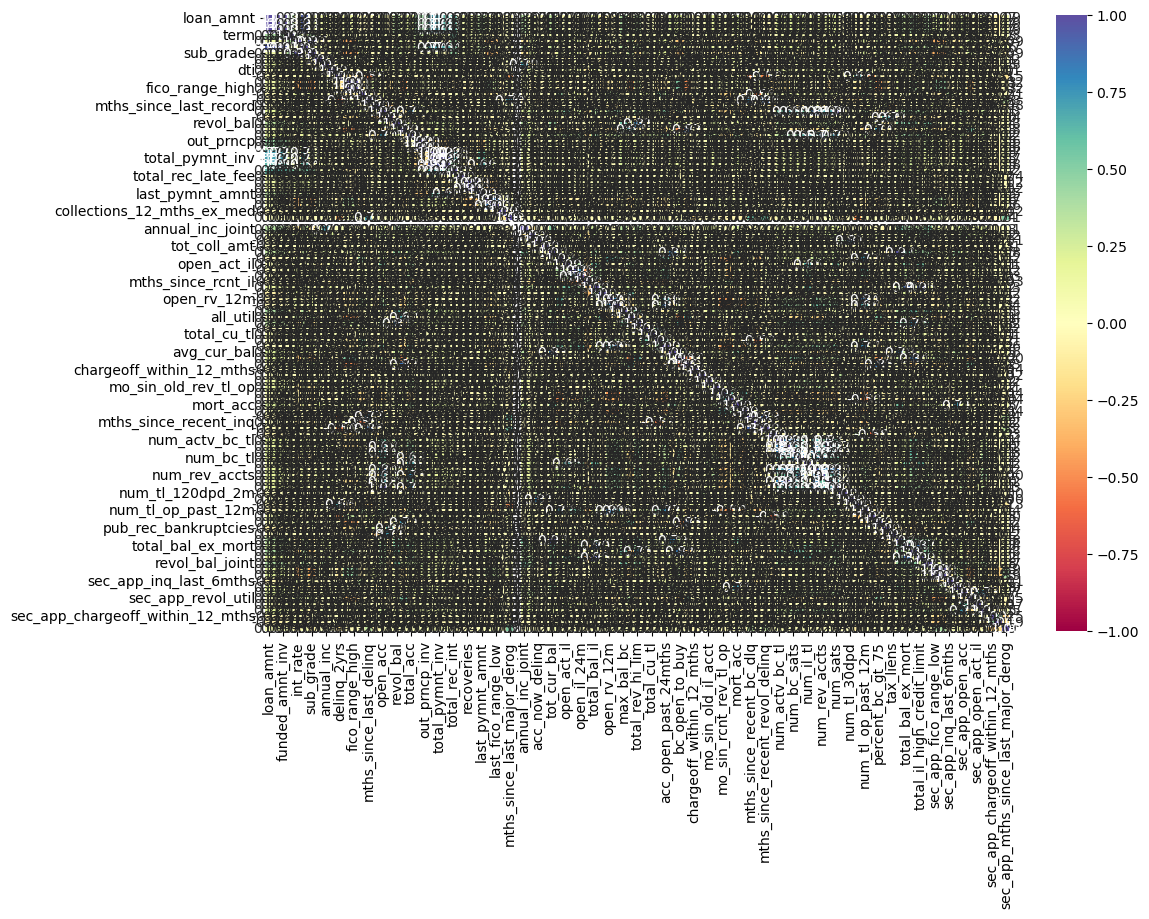

In [33]:
plt.figure(figsize=(12, 8))
sns.heatmap(bank1_df.corr(numeric_only = True), annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='Spectral')

<AxesSubplot:>

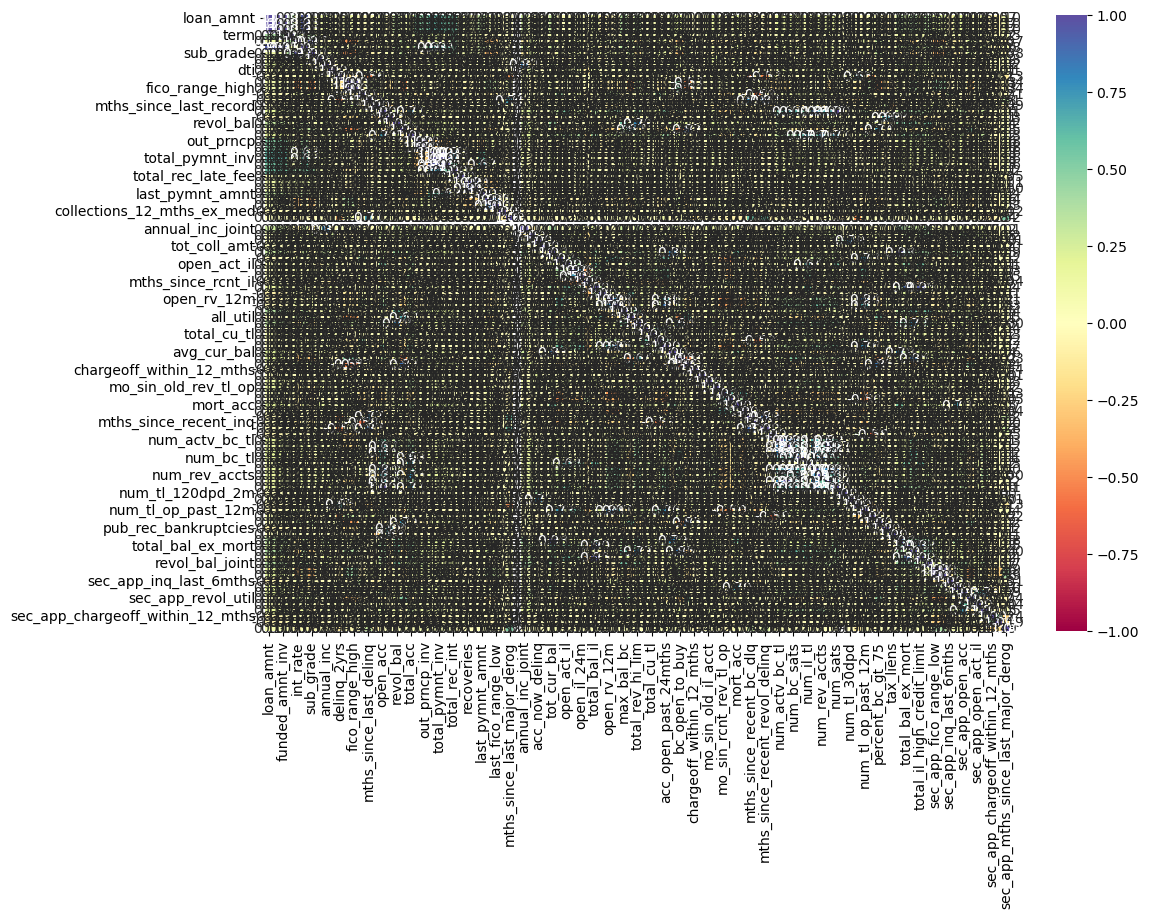

In [34]:
plt.figure(figsize=(12, 8))
sns.heatmap(bank2_df.corr(numeric_only = True), annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='Spectral')

# Visualize and minimize outliers

In [35]:
bank1_installment_box = bank1_df.hvplot.box(
    y='installment', 
    subplots=True, 
    by='loan_status',
    width=800, height=600,
    rot = 45,
    title='Bank 1, Status by Installment', 
    xlabel='Loan Status', 
    ylabel='Installment'
)

bank1_amnt_box = bank1_df.hvplot.box(
    y='loan_amnt', 
    subplots=True, 
    by='loan_status', 
    width=800, height=600,
    rot = 45,
    title='Bank 1, Loan Status by Amount', 
    xlabel='Loan Status', 
    ylabel='Loan Amount'
)

bank1_installment_box + bank1_amnt_box 

:Layout
   .BoxWhisker.I  :BoxWhisker   [loan_status]   (installment)
   .BoxWhisker.II :BoxWhisker   [loan_status]   (loan_amnt)

In [36]:
# minimize outliers 
q_low = bank1_df['annual_inc'].quantile(0.08)
q_hi  = bank1_df['annual_inc'].quantile(0.92)
bank1_df = bank1_df[(bank1_df['annual_inc'] < q_hi) & (bank2_df['annual_inc'] > q_low)]
bank1_df = bank1_df[(bank1_df['dti'] <=45)]
q_hi  = bank1_df['bc_open_to_buy'].quantile(0.95)
bank1_df = bank1_df[(bank1_df['bc_open_to_buy'] < q_hi)]
bank1_df = bank1_df[(bank1_df['bc_util'] <=160)]
bank1_df = bank1_df[(bank1_df['revol_util'] <=150)]
bank2_df = bank1_df[(bank1_df['num_op_rev_tl'] <=35)]


In [37]:
bank1_installment_box = bank1_df.hvplot.box(
    y='installment', 
    subplots=True, 
    by='loan_status',
    width=800, height=600,
    rot = 45,
    title='Bank 1, Status by Installment', 
    xlabel='Loan Status', 
    ylabel='Installment'
)

bank1_amnt_box = bank1_df.hvplot.box(
    y='loan_amnt', 
    subplots=True, 
    by='loan_status', 
    width=800, height=600,
    rot = 45,
    title='Bank 1, Loan Status by Amount', 
    xlabel='Loan Status', 
    ylabel='Loan Amount'
)

bank1_installment_box + bank1_amnt_box 

:Layout
   .BoxWhisker.I  :BoxWhisker   [loan_status]   (installment)
   .BoxWhisker.II :BoxWhisker   [loan_status]   (loan_amnt)

In [38]:
bank2_installment_box = bank2_df.hvplot.box(
    y='installment', 
    subplots=True, 
    by='loan_status', 
    width=800, height=600,
    rot = 45,
    title='Bank 2, Status by Installment', 
    xlabel='Loan Status', 
    ylabel='Installment'
)

bank2_amnt_box = bank2_df.hvplot.box(
    y='loan_amnt', 
    subplots=True, 
    by='loan_status', 
    width=800, height=600,
    rot = 45,
    title='Bank 2, Loan Status by Amount', 
    xlabel='Loan Status', 
    ylabel='Loan Amount'
)

bank2_installment_box + bank2_amnt_box

:Layout
   .BoxWhisker.I  :BoxWhisker   [loan_status]   (installment)
   .BoxWhisker.II :BoxWhisker   [loan_status]   (loan_amnt)

In [39]:
# minimize outliers 
q_low = bank2_df['annual_inc'].quantile(0.08)
q_hi  = bank2_df['annual_inc'].quantile(0.92)
bank2_df = bank2_df[(bank2_df['annual_inc'] < q_hi) & (bank2_df['annual_inc'] > q_low)]
bank2_df = bank2_df[(bank2_df['dti'] <=45)]
q_hi  = bank2_df['bc_open_to_buy'].quantile(0.95)
bank2_df = bank2_df[(bank2_df['bc_open_to_buy'] < q_hi)]
bank2_df = bank2_df[(bank2_df['bc_util'] <=160)]
bank2_df = bank2_df[(bank2_df['revol_util'] <=150)]
bank2_df = bank2_df[(bank2_df['num_op_rev_tl'] <=35)]


In [40]:
bank2_installment_box = bank2_df.hvplot.box(
    y='installment', 
    subplots=True, 
    by='loan_status', 
    width=800, height=600,
    rot = 45,
    title='Bank 2, Status by Installment', 
    xlabel='Loan Status', 
    ylabel='Installment'
)

bank2_amnt_box = bank2_df.hvplot.box(
    y='loan_amnt', 
    subplots=True, 
    by='loan_status', 
    width=800, height=600,
    rot = 45,
    title='Bank 2, Loan Status by Amount', 
    xlabel='Loan Status', 
    ylabel='Loan Amount'
)

bank2_installment_box + bank2_amnt_box

:Layout
   .BoxWhisker.I  :BoxWhisker   [loan_status]   (installment)
   .BoxWhisker.II :BoxWhisker   [loan_status]   (loan_amnt)

# Identify NaN and replace with 0

In [41]:
# identify NaN
display(bank1_df.isnull().values.any())
print('\n')
count_nan = bank1_df.isnull().sum()
display(count_nan)

True

loan_amnt                                   0
funded_amnt                                 0
funded_amnt_inv                             0
term                                        0
int_rate                                    0
                                        ...  
sec_app_open_act_il                    789694
sec_app_num_rev_accts                  789694
sec_app_chargeoff_within_12_mths       789694
sec_app_collections_12_mths_ex_med     789694
sec_app_mths_since_last_major_derog    813554
Length: 116, dtype: int64

In [42]:
# replace or fill NaN with 0 and confirm
bank1_df = bank1_df.fillna(0)
display(bank1_df.isnull().values.any())
print('\n')
count_nan = bank1_df.isnull().sum()
display(count_nan)

False

loan_amnt                              0
funded_amnt                            0
funded_amnt_inv                        0
term                                   0
int_rate                               0
                                      ..
sec_app_open_act_il                    0
sec_app_num_rev_accts                  0
sec_app_chargeoff_within_12_mths       0
sec_app_collections_12_mths_ex_med     0
sec_app_mths_since_last_major_derog    0
Length: 116, dtype: int64

In [43]:
# Review the DataFrame
display(bank1_df.head(3))
print('\n')
display(bank1_df.shape)
print('\n')
display(bank1_df.dtypes)
print('\n')
display(bank1_df.info())

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment grade  \
0     3600.0       3600.0           3600.0   1.0     13.99       123.03     C   
2    20000.0      20000.0          20000.0   2.0     10.78       432.66     B   
4    10400.0      10400.0          10400.0   2.0     22.45       289.91     F   

   sub_grade            emp_title  emp_length  ... sec_app_earliest_cr_line  \
0       24.0              leadman        10.0  ...                        0   
2       14.0         truck driver        10.0  ...                        0   
4       51.0  Contract Specialist         3.0  ...                        0   

   sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc  \
0                     0.0              0.0              0.0   
2                     0.0              0.0              0.0   
4                     0.0              0.0              0.0   

  sec_app_revol_util  sec_app_open_act_il  sec_app_num_rev_accts  \
0                0.0                  0.0                    0.0   
2                0.0                  0.0                    0.0   
4                0.0                  0.0                    0.0   

  sec_app_chargeoff_within_12_mths  sec_app_collections_12_mths_ex_med  \
0                              0.0                                 0.0   
2                              0.0                                 0.0   
4                              0.0                                 0.0   

   sec_app_mths_since_last_major_derog  
0                                  0.0  
2                                  0.0  
4                                  0.0  

[3 rows x 116 columns]

(825806, 116)

loan_amnt                              float64
funded_amnt                            float64
funded_amnt_inv                        float64
term                                   float64
int_rate                               float64
                                        ...   
sec_app_open_act_il                    float64
sec_app_num_rev_accts                  float64
sec_app_chargeoff_within_12_mths       float64
sec_app_collections_12_mths_ex_med     float64
sec_app_mths_since_last_major_derog    float64
Length: 116, dtype: object



<class 'pandas.core.frame.DataFrame'>
Int64Index: 825806 entries, 0 to 1060698
Columns: 116 entries, loan_amnt to sec_app_mths_since_last_major_derog
dtypes: float64(105), object(11)
memory usage: 737.1+ MB


None

In [44]:
# identify NaN
display(bank2_df.isnull().values.any())
print('\n')
count_nan = bank2_df.isnull().sum()
display(count_nan)

True

loan_amnt                                   0
funded_amnt                                 0
funded_amnt_inv                             0
term                                        0
int_rate                                    0
                                        ...  
sec_app_open_act_il                    624567
sec_app_num_rev_accts                  624567
sec_app_chargeoff_within_12_mths       624567
sec_app_collections_12_mths_ex_med     624567
sec_app_mths_since_last_major_derog    642310
Length: 116, dtype: int64

In [45]:
# replace or fill NaN with 0 and confirm
bank2_df = bank2_df.fillna(0)
display(bank2_df.isnull().values.any())
print('\n')
count_nan = bank2_df.isnull().sum()
display(count_nan)

False

loan_amnt                              0
funded_amnt                            0
funded_amnt_inv                        0
term                                   0
int_rate                               0
                                      ..
sec_app_open_act_il                    0
sec_app_num_rev_accts                  0
sec_app_chargeoff_within_12_mths       0
sec_app_collections_12_mths_ex_med     0
sec_app_mths_since_last_major_derog    0
Length: 116, dtype: int64

In [46]:
# Review the DataFrame
display(bank2_df.head(3))
print('\n')
display(bank2_df.shape)
print('\n')
display(bank2_df.dtypes)
print('\n')
display(bank2_df.info())

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment grade  \
0     3600.0       3600.0           3600.0   1.0     13.99       123.03     C   
2    20000.0      20000.0          20000.0   2.0     10.78       432.66     B   
4    10400.0      10400.0          10400.0   2.0     22.45       289.91     F   

   sub_grade            emp_title  emp_length  ... sec_app_earliest_cr_line  \
0       24.0              leadman        10.0  ...                        0   
2       14.0         truck driver        10.0  ...                        0   
4       51.0  Contract Specialist         3.0  ...                        0   

   sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc  \
0                     0.0              0.0              0.0   
2                     0.0              0.0              0.0   
4                     0.0              0.0              0.0   

  sec_app_revol_util  sec_app_open_act_il  sec_app_num_rev_accts  \
0                0.0                  0.0                    0.0   
2                0.0                  0.0                    0.0   
4                0.0                  0.0                    0.0   

  sec_app_chargeoff_within_12_mths  sec_app_collections_12_mths_ex_med  \
0                              0.0                                 0.0   
2                              0.0                                 0.0   
4                              0.0                                 0.0   

   sec_app_mths_since_last_major_derog  
0                                  0.0  
2                                  0.0  
4                                  0.0  

[3 rows x 116 columns]

(651541, 116)

loan_amnt                              float64
funded_amnt                            float64
funded_amnt_inv                        float64
term                                   float64
int_rate                               float64
                                        ...   
sec_app_open_act_il                    float64
sec_app_num_rev_accts                  float64
sec_app_chargeoff_within_12_mths       float64
sec_app_collections_12_mths_ex_med     float64
sec_app_mths_since_last_major_derog    float64
Length: 116, dtype: object



<class 'pandas.core.frame.DataFrame'>
Int64Index: 651541 entries, 0 to 1060698
Columns: 116 entries, loan_amnt to sec_app_mths_since_last_major_derog
dtypes: float64(105), object(11)
memory usage: 581.6+ MB


None

In [47]:
# Create a list of bank1_df categorical variables 
bank1_df_categorical_variables = list(bank1_df.dtypes[bank1_df.dtypes == 'object'].index)

# Display the categorical variables list
bank1_df_categorical_variables

['grade',
 'emp_title',
 'home_ownership',
 'verification_status',
 'loan_status',
 'addr_state',
 'earliest_cr_line',
 'last_credit_pull_d',
 'application_type',
 'verification_status_joint',
 'sec_app_earliest_cr_line']

In [56]:
# Instantiate OneHotEncoder
bank1_enc = OneHotEncoder(sparse=False)
# Encode the categorcal variables using OneHotEncoder
bank1_encoded_data = bank1_enc.fit_transform(bank1_df[bank1_df_categorical_variables])


TypeError: Encoders require their input to be uniformly strings or numbers. Got ['int', 'str']

In [48]:
# Create a list of bank1_df categorical variables 
bank2_df_categorical_variables = list(bank2_df.dtypes[bank2_df.dtypes == 'object'].index)

# Display the categorical variables list
bank2_df_categorical_variables

['grade',
 'emp_title',
 'home_ownership',
 'verification_status',
 'loan_status',
 'addr_state',
 'earliest_cr_line',
 'last_credit_pull_d',
 'application_type',
 'verification_status_joint',
 'sec_app_earliest_cr_line']

In [49]:
for col in bank1_df.columns:
    display(col)

'loan_amnt'

'funded_amnt'

'funded_amnt_inv'

'term'

'int_rate'

'installment'

'grade'

'sub_grade'

'emp_title'

'emp_length'

'home_ownership'

'annual_inc'

'verification_status'

'loan_status'

'addr_state'

'dti'

'delinq_2yrs'

'earliest_cr_line'

'fico_range_low'

'fico_range_high'

'inq_last_6mths'

'mths_since_last_delinq'

'mths_since_last_record'

'open_acc'

'pub_rec'

'revol_bal'

'revol_util'

'total_acc'

'out_prncp'

'out_prncp_inv'

'total_pymnt'

'total_pymnt_inv'

'total_rec_prncp'

'total_rec_int'

'total_rec_late_fee'

'recoveries'

'collection_recovery_fee'

'last_pymnt_amnt'

'last_credit_pull_d'

'last_fico_range_high'

'last_fico_range_low'

'collections_12_mths_ex_med'

'mths_since_last_major_derog'

'policy_code'

'application_type'

'annual_inc_joint'

'dti_joint'

'verification_status_joint'

'acc_now_delinq'

'tot_coll_amt'

'tot_cur_bal'

'open_acc_6m'

'open_act_il'

'open_il_12m'

'open_il_24m'

'mths_since_rcnt_il'

'total_bal_il'

'il_util'

'open_rv_12m'

'open_rv_24m'

'max_bal_bc'

'all_util'

'total_rev_hi_lim'

'inq_fi'

'total_cu_tl'

'inq_last_12m'

'acc_open_past_24mths'

'avg_cur_bal'

'bc_open_to_buy'

'bc_util'

'chargeoff_within_12_mths'

'delinq_amnt'

'mo_sin_old_il_acct'

'mo_sin_old_rev_tl_op'

'mo_sin_rcnt_rev_tl_op'

'mo_sin_rcnt_tl'

'mort_acc'

'mths_since_recent_bc'

'mths_since_recent_bc_dlq'

'mths_since_recent_inq'

'mths_since_recent_revol_delinq'

'num_accts_ever_120_pd'

'num_actv_bc_tl'

'num_actv_rev_tl'

'num_bc_sats'

'num_bc_tl'

'num_il_tl'

'num_op_rev_tl'

'num_rev_accts'

'num_rev_tl_bal_gt_0'

'num_sats'

'num_tl_120dpd_2m'

'num_tl_30dpd'

'num_tl_90g_dpd_24m'

'num_tl_op_past_12m'

'pct_tl_nvr_dlq'

'percent_bc_gt_75'

'pub_rec_bankruptcies'

'tax_liens'

'tot_hi_cred_lim'

'total_bal_ex_mort'

'total_bc_limit'

'total_il_high_credit_limit'

'revol_bal_joint'

'sec_app_fico_range_low'

'sec_app_fico_range_high'

'sec_app_earliest_cr_line'

'sec_app_inq_last_6mths'

'sec_app_mort_acc'

'sec_app_open_acc'

'sec_app_revol_util'

'sec_app_open_act_il'

'sec_app_num_rev_accts'

'sec_app_chargeoff_within_12_mths'

'sec_app_collections_12_mths_ex_med'

'sec_app_mths_since_last_major_derog'

In [50]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_data = StandardScaler().fit_transform(bank1_df)

ValueError: could not convert string to float: 'C'

In [ ]:
# use standard scaler to scale accross all column values
bank1_df_scaled = StandardScaler().fit_transform(bank1_df)
# create a dataframe with the scaled data
top_100_crypto_data_scaled = pd.DataFrame(
    top_100_crypto_data_scaled,
    columns=['Price', 'Changes 24H', 'Changes 7D', 'Changes 30D', 'Changes 1Y', 'Market Cap', 'Volume 24H', 'Available Supply'],
    index = top_100_crypto_data.index
)
top_100_crypto_data_scaled.head()

# Loan accepted: If the company approves the loan, there are ~3 primary possible scenarios described below:
> * Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
> * Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
>> * Grace period
>> * Late (16-30)
>> * Late (31-120)
>> * Default
> * Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan

In [ ]:
# Import the OHLCV dataset into a Pandas Dataframe
accepted_df = pd.read_csv(
    Path('/Users/lokiskylizard/Desktop/proj2data/archive/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv'),
    low_memory=False,
    infer_datetime_format=True, 
    parse_dates=True
)

# Review the DataFrame
display(accepted_df.shape)
display(accepted_df.head(3))